In [1]:
# Plot ad hoc mnist instances
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

(60000, 28, 28) (60000,)


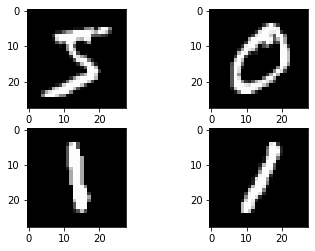

In [2]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[200], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[345], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
batch_size = 128
num_classes = 10
epochs = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
#!pip install tensorflow==1.14.0

In [0]:
#import keras modules
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras import backend as K

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening the 2D arrays for fully connected layers

model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [13]:
hist = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has been succefully trained.")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 38s 637us/step - loss: 0.0575 - acc: 0.9823 - val_loss: 0.0513 - val_acc: 0.9833
Epoch 2/10
60000/60000 [==============================] - 38s 637us/step - loss: 0.0424 - acc: 0.9869 - val_loss: 0.0300 - val_acc: 0.9898
Epoch 3/10
60000/60000 [==============================] - 38s 628us/step - loss: 0.0336 - acc: 0.9895 - val_loss: 0.0287 - val_acc: 0.9908
Epoch 4/10
60000/60000 [==============================] - 38s 634us/step - loss: 0.0271 - acc: 0.9915 - val_loss: 0.0275 - val_acc: 0.9907
Epoch 5/10
60000/60000 [==============================] - 38s 634us/step - loss: 0.0221 - acc: 0.9930 - val_loss: 0.0265 - val_acc: 0.9908
Epoch 6/10
60000/60000 [==============================] - 38s 632us/step - loss: 0.0201 - acc: 0.9939 - val_loss: 0.0243 - val_acc: 0.9915
Epoch 7/10
60000/60000 [==============================] - 38s 629us/step - loss: 0.0164 - acc: 0.9948 - val_loss: 0.

In [14]:
model.save('mnist.h5')
print('The trained weights have been saved.')

The trained weights have been saved.


In [15]:
model.evaluate(x_test, y_test)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 2s 224us/step
Test loss: 0.02770292208134206
Test accuracy: 0.9919


The number predicted is :  9


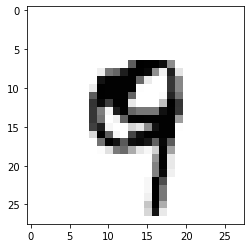

In [17]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('The number predicted is : ', pred.argmax())